In [195]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
import json

with open('output_data_rnn.json', 'r') as f:
    data = json.load(f)

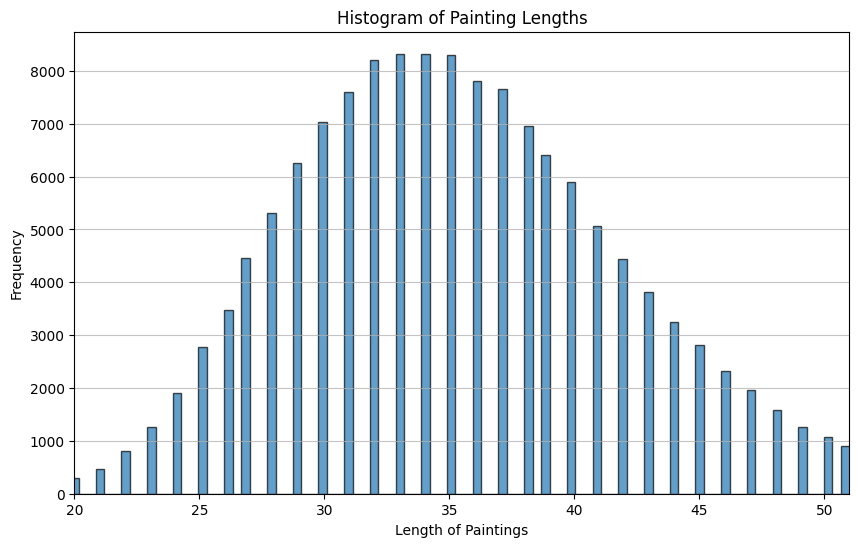

In [196]:
painting_lengths = [len(painting) for painting in data]

plt.figure(figsize=(10, 6))
plt.hist(painting_lengths, bins='auto', alpha=0.7, edgecolor='black')
plt.title('Histogram of Painting Lengths')
plt.xlabel('Length of Paintings')
plt.ylabel('Frequency')
plt.xlim(20, 51)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [211]:
data_selected = []
for painting in data:
    if len(painting) > 33:
        data_selected.append(painting[:33])
    elif len(painting) == 33:
        data_selected.append(painting)


In [212]:
data_selected = np.array(data_selected)
data_selected.shape

(94207, 33, 2)

There are 8326 paintings of apples containg 34 pairs of coordinates

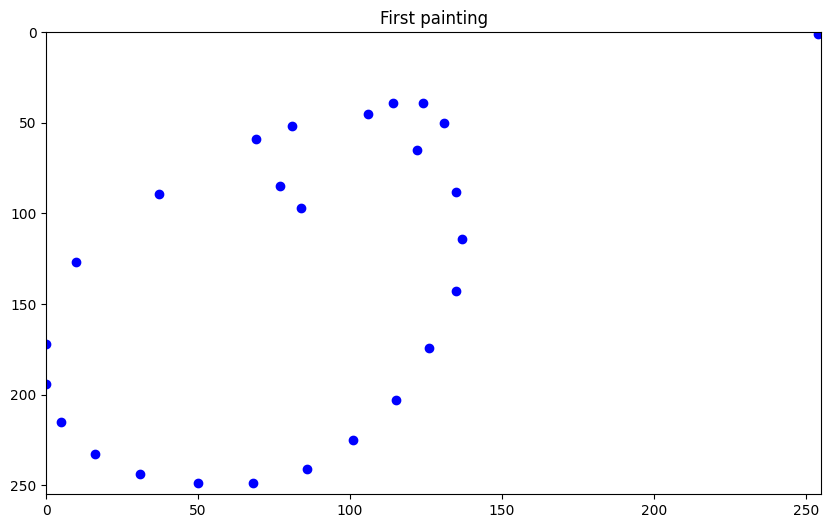

In [213]:
# scatter plot first data_selected
plt.figure(figsize=(10, 6))
plt.scatter(data_selected[0, :, 0], data_selected[0, :, 1], c='blue', label='First Painting')
plt.title('First painting')
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.gca().invert_yaxis()
plt.show()

In [214]:
inputs = []
targets = []

for painting in data_selected:
    max_initial_length = min(len(painting), 32)  
    for initial_length in range(4, max_initial_length + 1): 
        input_sequence = painting[:initial_length]  
        target_sequence = painting[initial_length]  
        inputs.append(input_sequence)
        targets.append(target_sequence)

inputs = pad_sequences(inputs, padding='post', dtype='float32')
inputs = np.array(inputs)
targets = np.array(targets)

Text(0.5, 1.0, 'First painting')

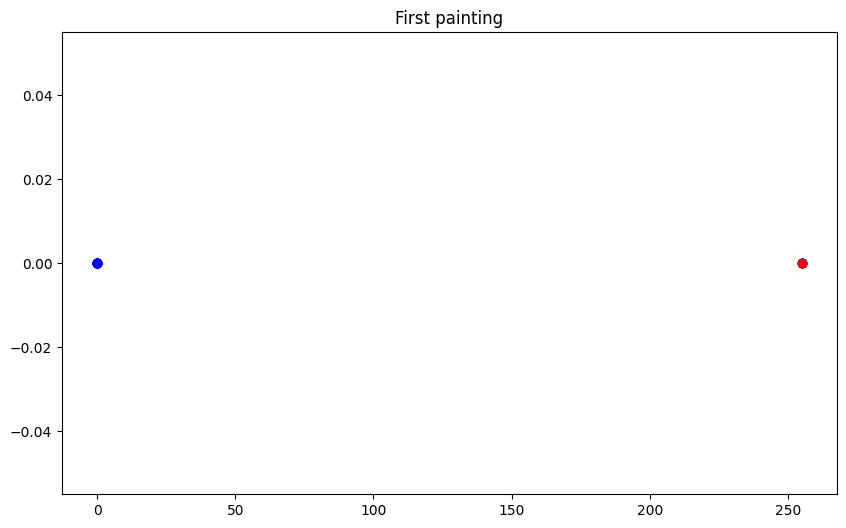

In [215]:
plt.figure(figsize=(10, 6))
plt.scatter(inputs[0, :, 0], inputs[0, :, 1], c='blue', label='First Painting')
plt.scatter(targets[0, 0], targets[0, 1], c='red', label='Target')
plt.title('First painting')

In [219]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Masking, Dropout

model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=(inputs.shape[1], inputs.shape[2])))  
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.1))
model.add(Dense(2))  

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

history = model.fit(inputs, targets, epochs=1, batch_size=1024, validation_split=0.2)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_26 (Masking)            │ (None, 32, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_38 (LSTM)                  │ (None, 32, 64)         │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_39 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,634 (115.76 KB)

 Trainable params: 29,634 (115.76 KB)

 Non-trainable params: 0 (0.00 B)

 355/2135 ━━━━━━━━━━━━━━━━━━━━ 6:27 218ms/step - loss: 19204.7363 - mae: 116.4185

KeyboardInterrupt: 

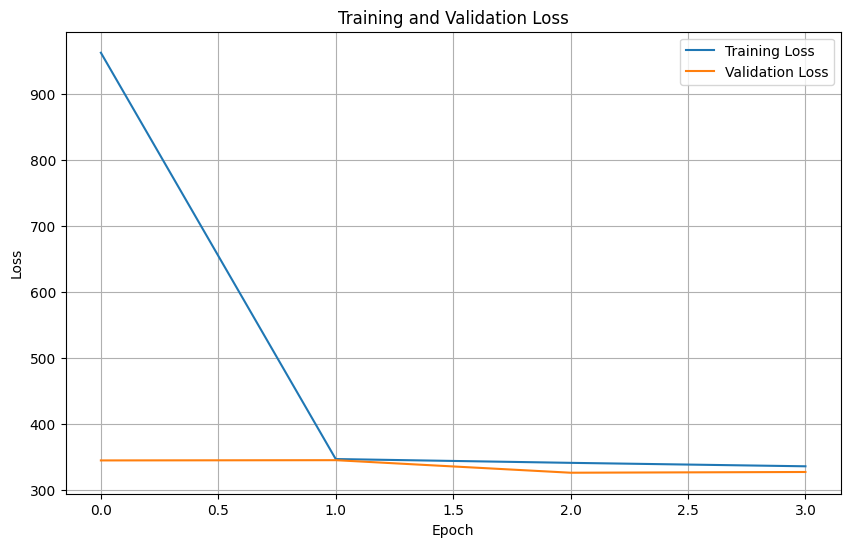

In [203]:
# plot loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

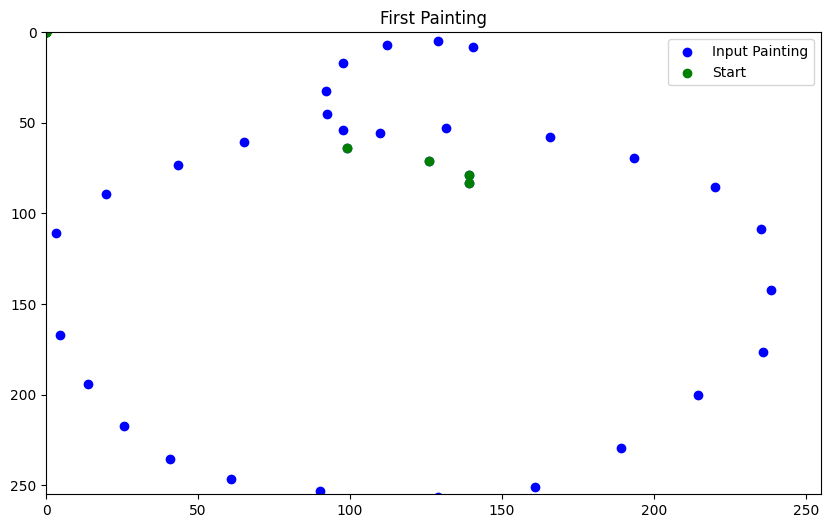

In [204]:
fabricated_inputs = inputs.copy()
id = 35*5 + 11

for i in range(30):
    prediction = model.predict(fabricated_inputs[id].reshape(1, fabricated_inputs.shape[1], fabricated_inputs.shape[2]))
    fabricated_inputs[id][i+4] = [x for x in prediction[0]]

plt.figure(figsize=(10, 6))
plt.scatter(fabricated_inputs[id, :, 0], fabricated_inputs[id, :, 1], c='blue', label='Input Painting')
plt.scatter(inputs[id, :, 0], inputs[id, :, 1], c='green', label='Start')
plt.title('First Painting')
plt.legend()
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# save model to ../models/
save = False
if save == True:
    model.save('../models/lstm_model3.h5')